Импорт библиотек

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import KNNImputer

Импорт данных

In [247]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

Map_1 = pd.DataFrame(import_dataset_from_file('Map_1.txt'))
Map_2 = pd.DataFrame(import_dataset_from_file('Map_2.txt'))
Map_3 = pd.DataFrame(import_dataset_from_file('Map_3.txt'))
Map_4 = pd.DataFrame(import_dataset_from_file('Map_4.txt'))
Map_5 = pd.DataFrame(import_dataset_from_file('Map_5.txt'))
Point_dataset = pd.DataFrame(import_dataset_from_file('Point_dataset.txt'))

Посмотрим на структуру данных

In [248]:
Map_1.info(), Point_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196495 entries, 0 to 1196494
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196495 non-null  float64
 1   y       1196495 non-null  float64
 2   z       1196495 non-null  float64
dtypes: float64(3)
memory usage: 27.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       441 non-null    float64
 1   y       441 non-null    float64
 2   z       441 non-null    float64
dtypes: float64(3)
memory usage: 10.5 KB


(None, None)

Посмотрим на 2д карты

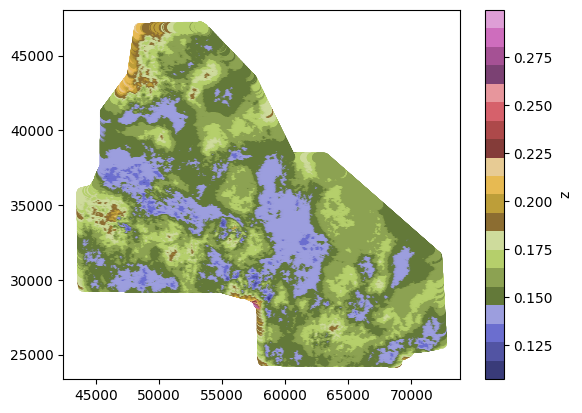

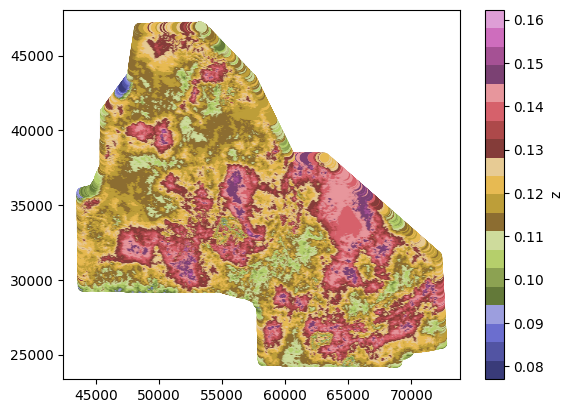

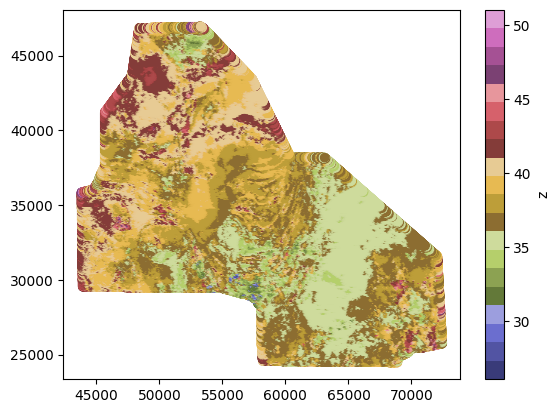

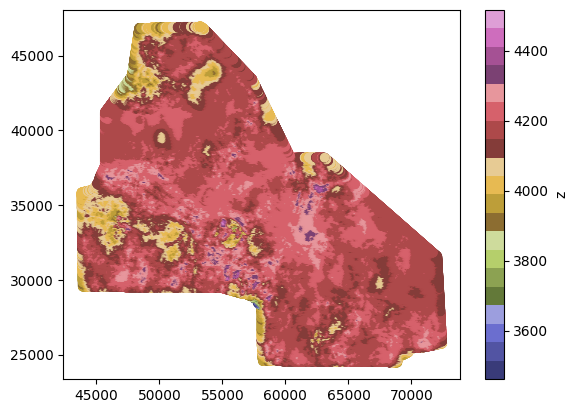

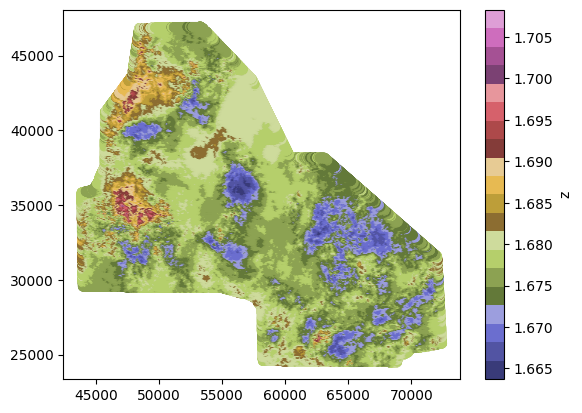

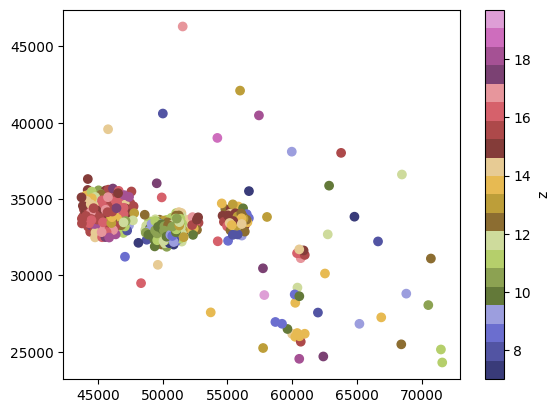

(None, None, None, None, None, None)

In [249]:
def make_map(dataset):
    """
    graph drawing function
    """
    x = dataset['x']
    y = dataset['y']
    z = dataset['z']
    plt.scatter(x, y, c=z, cmap='tab20b')
    plt.colorbar(label='z')
    plt.show()

make_map(Map_1), make_map(Map_2), make_map(Map_3), make_map(Map_4), make_map(Map_5), make_map(Point_dataset)

Объединим датасеты для дальнейшей работы

In [250]:
# пронумеруем столбцы z соответственно Map 
Map_1 = Map_1.rename(columns={'z': 'z1'})
Map_2 = Map_2.rename(columns={'z': 'z2'})
Map_3 = Map_3.rename(columns={'z': 'z3'})
Map_4 = Map_4.rename(columns={'z': 'z4'})
Map_5 = Map_5.rename(columns={'z': 'z5'})

data = pd.merge(Map_1, Map_2, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_3, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_4, left_on=['x', 'y'], right_on=['x', 'y'])
data = pd.merge(data, Map_5, left_on=['x', 'y'], right_on=['x', 'y'])
data

,x,y,z1,z2,z3,z4,z5
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68
...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68


Посмотрим еще на количество уникальных значений

In [251]:
columns = ['x', 'y', 'z1', 'z2', 'z3', 'z4', 'z5']
for i in columns:
    print(len(data[i].unique()))

2289
900
9853
6979
620609
454646
3620


+ data и Point_dataset не имеют пересекающихся точек x, y

In [252]:
data1 = pd.merge(data, Point_dataset, how='outer', left_on=['x', 'y'], right_on=['x', 'y']) # это удалить надо будет
print(data1, data1.info())


for i in columns:
    print(i,'min', data[i].min(), 'max', data[i].max(), 'median', data[i].median() )
    print('mean', data[i].mean(), 'std', data[i].std())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196904 entries, 0 to 1196903
Data columns (total 8 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1196904 non-null  float64
 1   y       1196904 non-null  float64
 2   z1      1196463 non-null  float64
 3   z2      1196463 non-null  float64
 4   z3      1196463 non-null  float64
 5   z4      1196463 non-null  float64
 6   z5      1196463 non-null  float64
 7   z       441 non-null      float64
dtypes: float64(8)
memory usage: 73.1 MB
               x        y   z1   z2    z3      z4   z5     z
0       68239.21 24467.00 0.16 0.11 40.34 4142.34 1.68   NaN
1       68251.71 24467.00 0.16 0.11 40.48 4139.92 1.68   NaN
2       68264.21 24467.00 0.16 0.11 40.69 4138.23 1.68   NaN
3       68276.71 24467.00 0.16 0.11 40.84 4138.50 1.68   NaN
4       68289.21 24467.00 0.16 0.11 41.04 4138.97 1.68   NaN
...          ...      ...  ...  ...   ...     ...  ...   ...
1196899 65193.40 26832.74  NaN

Нам необходимо найти значения точек в узлах сетки, для этого заменим имеющиеся точки ближайшими точками из узлов

In [253]:
def replace_closest_values(arr1, arr2):
    replaced_arr = np.zeros_like(arr2)

    for i, val in enumerate(arr2):
        closest_val = find_closest_value(val, arr1)
        replaced_arr[i] = closest_val

    return replaced_arr

def find_closest_value(val, arr):
    return arr[np.abs(arr - val).argmin()]



Point_dataset_new_x = replace_closest_values(data['x'], Point_dataset['x'])
Point_dataset_new_y = replace_closest_values(data['y'], Point_dataset['y'])

r2_x = r2_score(Point_dataset['x'], Point_dataset_new_x)
r2_y = r2_score(Point_dataset['y'], Point_dataset_new_y)
r2_x, r2_y

(0.9999982339788553, 0.9999760306402811)

Заменим столбцы в Point_dataset

In [254]:
Point_dataset['x'] = Point_dataset_new_x
Point_dataset['y'] = Point_dataset_new_y
Point_dataset

,x,y,z
0,44226.71,35592.00,14.97
1,60001.71,26167.00,14.08
2,44301.71,35292.00,14.26
3,52776.71,33442.00,15.35
4,49639.21,30692.00,14.42
...,...,...,...
436,65189.21,26842.00,9.37
437,50026.71,40617.00,7.64
438,43839.21,35117.00,14.62
439,71489.21,25142.00,11.01


Объединим бд по совпадающим x и y и оставим только пересекающиеся точки

           x        y   z1   z2    z3      z4   z5     z
0   60551.71 24542.00 0.16 0.11 35.08 4122.22 1.68 18.35
1   62401.71 24692.00 0.15 0.11 38.56 4144.41 1.68 17.45
2   68426.71 25492.00 0.14 0.13 36.60 4248.91 1.68 12.48
3   60664.21 25667.00 0.15 0.11 37.93 4188.44 1.68 15.89
4   60239.21 25992.00 0.15 0.11 36.91 4179.92 1.68 13.78
..       ...      ...  ...  ...   ...     ...  ...   ...
427 45789.21 39567.00 0.15 0.12 36.52 4184.29 1.68 14.31
428 57439.21 40492.00 0.16 0.12 39.77 4231.93 1.68 18.22
429 50026.71 40617.00 0.16 0.14 41.53 4174.12 1.67  7.64
430 55976.71 42117.00 0.15 0.12 40.09 4201.04 1.68 12.77
431 51551.71 46317.00 0.16 0.13 36.59 4175.95 1.68 16.90

[432 rows x 8 columns]        x     y    z1    z2    z3    z4    z5     z
x   1.00 -0.50 -0.47  0.10 -0.66  0.45 -0.33 -0.31
y  -0.50  1.00  0.24 -0.08  0.36 -0.20  0.23  0.23
z1 -0.47  0.24  1.00  0.08  0.42 -0.92  0.07 -0.00
z2  0.10 -0.08  0.08  1.00 -0.24 -0.04 -0.33 -0.79
z3 -0.66  0.36  0.42 -0.24  1.00 -0.3

<Axes: >

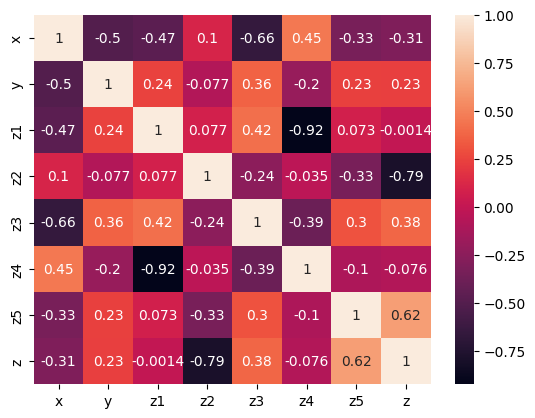

In [255]:
data2 = pd.merge(data, Point_dataset, how='inner', left_on=['x', 'y'], right_on=['x', 'y'])
print(data2, data2.corr())
# тарет кореллирует с z2, попробуем удалить этот столбец из фич
sns.heatmap(data2.corr(), annot=True)

In [256]:
data2 = data2.drop(columns='z2')
data2

,x,y,z1,z3,z4,z5,z
0,60551.71,24542.00,0.16,35.08,4122.22,1.68,18.35
1,62401.71,24692.00,0.15,38.56,4144.41,1.68,17.45
2,68426.71,25492.00,0.14,36.60,4248.91,1.68,12.48
3,60664.21,25667.00,0.15,37.93,4188.44,1.68,15.89
4,60239.21,25992.00,0.15,36.91,4179.92,1.68,13.78
...,...,...,...,...,...,...,...
427,45789.21,39567.00,0.15,36.52,4184.29,1.68,14.31
428,57439.21,40492.00,0.16,39.77,4231.93,1.68,18.22
429,50026.71,40617.00,0.16,41.53,4174.12,1.67,7.64
430,55976.71,42117.00,0.15,40.09,4201.04,1.68,12.77


Воспользуемся lazypredict для предварительной оценки и выбора моделей 

In [257]:
columns = ['x', 'y', 'z1', 'z3', 'z4', 'z5']


x = data2[columns]
y = data2['z']

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
regr = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=mse)
models, prediction = regr.fit(Xtrain, Xtest, ytrain, ytest)
models

100%|██████████| 42/42 [00:03<00:00, 11.51it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken,mean_squared_error
Model,,,,,
RandomForestRegressor,0.73,0.75,1.58,0.46,2.50
ExtraTreesRegressor,0.72,0.74,1.60,0.22,2.55
BaggingRegressor,0.71,0.73,1.63,0.06,2.66
LGBMRegressor,0.70,0.72,1.66,0.03,2.74
HistGradientBoostingRegressor,0.70,0.72,1.66,0.14,2.74
KNeighborsRegressor,0.68,0.70,1.71,0.01,2.94
DecisionTreeRegressor,0.68,0.70,1.71,0.01,2.94
XGBRegressor,0.68,0.70,1.72,0.06,2.95
AdaBoostRegressor,0.65,0.68,1.78,0.08,3.18


Catboost нет в lazypredict, поэтому его нужно проверить отдельно

In [258]:
model_cb = CatBoostRegressor(verbose=False)
model_cb.fit(Xtrain, ytrain)
y_model = model_cb.predict(Xtest)
mse(ytest, y_model), r2_score(ytest, y_model)

(2.661392498822591, 0.7303341355791664)

In [259]:
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)
y_pred = rfr.predict(Xtest)
r2_score(ytest, y_pred)

0.7342586857082487

Catboost предварительно показал неплохие резултаты, поэтому попробуем воспользоваться им и другими моделями для ансамблирования. Сначала проведем gridsearch для поиска наилучших параметров для каждой модели отдельно, а потом только сделаем ансамбль 

In [260]:
rfr = RandomForestRegressor()
pipe_rfr = Pipeline([('scaler', StandardScaler()), ('rfr', rfr)])
param_grid_rfr = {
    'rfr__n_estimators': [100, 300, 500,],
    'rfr__max_leaf_nodes':[None, 1, 5, 10],
    'rfr__max_depth': [None, 3, 5, 10, 30]
}

grid_search_rfr = GridSearchCV(estimator=pipe_rfr, param_grid=param_grid_rfr, cv=5)

grid_search_rfr.fit(Xtrain, ytrain)

print("best_params_rfr:", grid_search_rfr.best_params_, '\n'
      'best_score_rfr:', grid_search_rfr.best_score_)

best_params_rfr: {'rfr__max_depth': 10, 'rfr__max_leaf_nodes': None, 'rfr__n_estimators': 300} 
best_score_rfr: 0.7751668837552183


In [278]:
cbr = CatBoostRegressor(verbose=False)

pipe_cbr = Pipeline([('scaler', StandardScaler()), ('cbr', cbr)])
param_grid_cbr = {
    'cbr__iterations': [100, 300, 500],
    'cbr__learning_rate': [1, 0.1, 0.01],
    'cbr__depth': [3, 5, 10],
    'verbose': [False]
}

grid_search_cbr = GridSearchCV(estimator=pipe_cbr, param_grid=param_grid_cbr, cv=5)

grid_search_cbr.fit(Xtrain, ytrain)

print("best_params_cbr:", grid_search_cbr.best_params_, '\n'
      'best_score_cbr:', grid_search_cbr.best_score_)

best_params_cbr: {'cbr__depth': 5, 'cbr__iterations': 500, 'cbr__learning_rate': 0.1, 'verbose': False} 
best_score_cbr: 0.5239027092837023


In [262]:
etr = ExtraTreesRegressor()

pipe_etr = Pipeline([('scaler', StandardScaler()), ('etr', etr)])
param_grid_etr = {
    'etr__n_estimators': [100, 300, 500,],
    'etr__max_leaf_nodes':[None, 1, 5, 10],
    'etr__max_depth': [None, 3, 5, 10, 30]
}

grid_search_etr = GridSearchCV(estimator=pipe_etr, param_grid=param_grid_etr, cv=5)

grid_search_etr.fit(Xtrain, ytrain)

print("best_params_etr:", grid_search_etr.best_params_, '\n'
      'best_score_etr:', grid_search_etr.best_score_)

best_params_etr: {'etr__max_depth': 30, 'etr__max_leaf_nodes': None, 'etr__n_estimators': 500} 
best_score_etr: 0.8078489777505933


Сделаем ансамбль для моделей с лучшими параметрами

In [263]:
rfr_bp = RandomForestRegressor(max_depth=grid_search_rfr.best_params_['rfr__max_depth'],
                            max_leaf_nodes=grid_search_rfr.best_params_['rfr__max_leaf_nodes'],
                            n_estimators=grid_search_rfr.best_params_['rfr__n_estimators'])

cbr_bp = CatBoostRegressor(depth=grid_search_cbr.best_params_['cbr__depth'],
                        iterations=grid_search_cbr.best_params_['cbr__iterations'],
                        learning_rate=grid_search_cbr.best_params_['cbr__learning_rate'],
                        verbose=False)

etr_bp = ExtraTreesRegressor(max_depth=grid_search_etr.best_params_['etr__max_depth'],
                            max_leaf_nodes=grid_search_etr.best_params_['etr__max_leaf_nodes'],
                            n_estimators=grid_search_etr.best_params_['etr__n_estimators'])

vot_reg = VotingRegressor(estimators = [('etr_bp', etr_bp), ('cbr_bp', cbr_bp), ('rfr_bp', rfr_bp)])

vot_reg.fit(Xtrain, ytrain)
ypred = vot_reg.predict(Xtest)
print(mse(ypred, ytest), r2_score(ypred, ytest))

#scores_train = cross_val_score(vot_reg, Xtrain, ytrain, cv=10, scoring='r2')
#scores_test = cross_val_score(vot_reg, Xtest, ytest, cv=10, scoring='r2')

#print(scores_test.mean(), scores_train.mean())
#scores_test, scores_train

2.5491495987002724 0.5688453376251785


Ансамбль работает хуже, чем каждая модель по отдельности, похоже модели скореллированы между собой, что и уменьшает точность работы ансамбля. Возьмем одну с наилучшим r2 для посторения вектора значений f1

In [264]:
etr_bm = grid_search_etr.best_estimator_

etr_bm.fit(Xtrain, ytrain)
ypred = etr_bm.predict(Xtest)
print(r2_score(ytest, ypred))

0.7607375988732341


Посмотрим на график feature importance 

Text(0.5, 1.0, 'Feature importance for ExtraTreesRegressor')

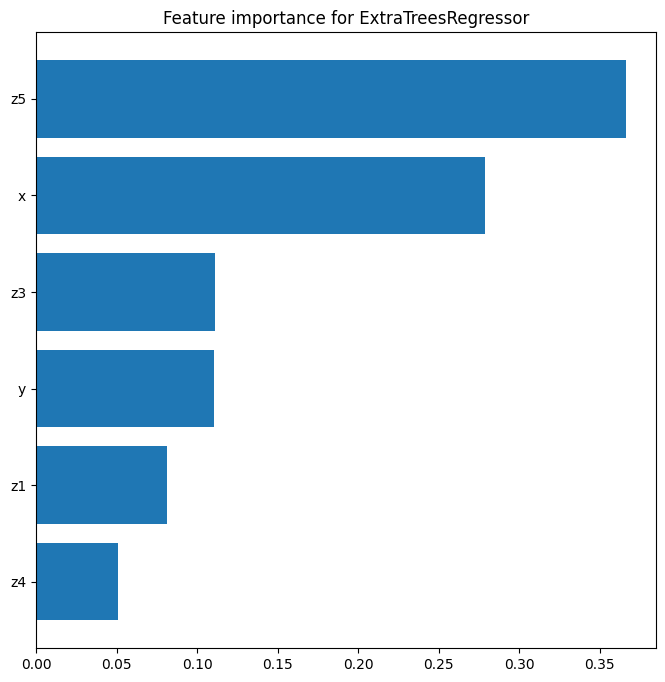

In [265]:
etr_bp.fit(Xtrain, ytrain)
feature_importance = etr_bp.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(8, 8))
plt.barh(range(len(sorted_idx[-8:])), feature_importance[sorted_idx[-8:]], align='center')
plt.yticks(range(len(sorted_idx[-8:])), np.array(Xtest.columns)[sorted_idx[-8:]])
plt.title('Feature importance for ExtraTreesRegressor')

Построим кривую обучения на кросс-валидации для изменяющегося количества данных

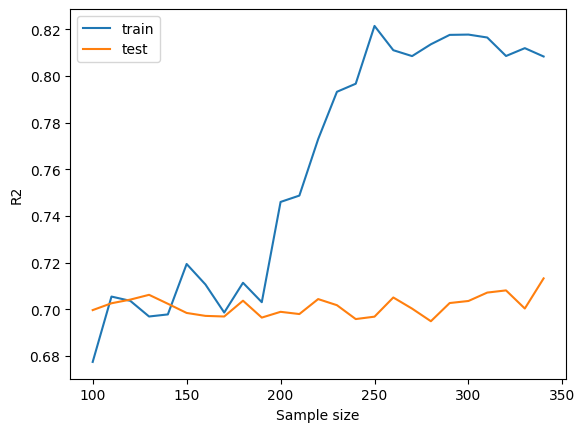

In [266]:
train_scores = []
test_scores = []

sample_sizes = np.arange(100, 350, 10)

for size in sample_sizes:
    Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.2)
    Xtrain = Xtrain[:size]
    ytrain = ytrain[:size]
    Xtest = Xtest[:size]
    ytest = ytest[:size]
    train_score = cross_val_score(etr_bm, Xtrain, ytrain, cv=5, scoring='r2')
    test_score = cross_val_score(etr_bm, Xtest, ytest, cv=5, scoring='r2')
    train_scores.append(train_score.mean())
    test_scores.append(test_score.mean())

plt.plot(sample_sizes, train_scores, label='train')
plt.plot(sample_sizes, test_scores, label='test')
plt.xlabel('Sample size')
plt.ylabel('R2')
plt.legend()
plt.show()

Обучим модель на всех данных data2

In [269]:
etr_bm = grid_search_etr.best_estimator_

Xtrain = data2[columns]
ytrain = data2['z']

etr_bm.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('etr', ExtraTreesRegressor(max_depth=30, n_estimators=500))])

Будем заполнять значения в Point_dataset

In [270]:
f1 = pd.merge(data, Point_dataset, how='left', left_on=['x', 'y'], right_on=['x', 'y'])
f1_new = f1[f1['z'].isnull()]
f1_new

,x,y,z1,z2,z3,z4,z5,z
0,68239.21,24467.00,0.16,0.11,40.34,4142.34,1.68,NaN
1,68251.71,24467.00,0.16,0.11,40.48,4139.92,1.68,NaN
2,68264.21,24467.00,0.16,0.11,40.69,4138.23,1.68,NaN
3,68276.71,24467.00,0.16,0.11,40.84,4138.50,1.68,NaN
4,68289.21,24467.00,0.16,0.11,41.04,4138.97,1.68,NaN
...,...,...,...,...,...,...,...,...
1196458,53239.21,46942.00,0.17,0.11,41.70,4022.73,1.68,NaN
1196459,53251.71,46942.00,0.17,0.11,37.71,4022.96,1.68,NaN
1196460,53264.21,46942.00,0.17,0.11,37.66,4022.32,1.68,NaN
1196461,53276.71,46942.00,0.17,0.11,37.21,4023.46,1.68,NaN


In [271]:
X = f1_new[columns]
Y = f1['z']
Y = etr_bm.predict(X)
Y = pd.DataFrame(Y.reshape(-1, 1))
Y.rename(columns={0: 'f1'}, inplace=True)
Y

,f1
0,13.41
1,13.34
2,13.37
3,13.31
4,13.26
...,...
1196026,12.90
1196027,13.67
1196028,13.18
1196029,13.22


1195124


<Axes: xlabel='f1', ylabel='Count'>

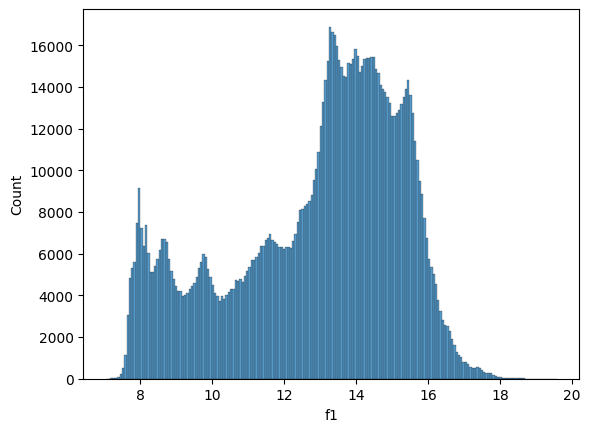

In [272]:
print(len(Y['f1'].unique()))
sns.histplot(Y['f1'])

<Axes: xlabel='z', ylabel='Count'>

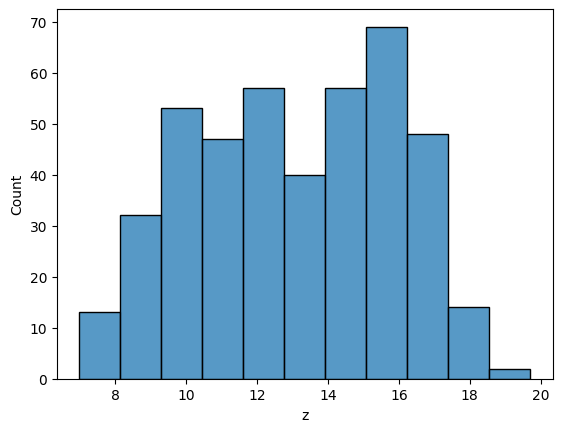

In [273]:
sns.histplot(data2['z'])

In [274]:
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)
data2.rename(columns={'z': 'f1'}, inplace=True)
F1 = pd.concat([X, Y], axis=1, ignore_index=False)
F1


,x,y,z1,z3,z4,z5,f1
0,68239.21,24467.00,0.16,40.34,4142.34,1.68,13.41
1,68251.71,24467.00,0.16,40.48,4139.92,1.68,13.34
2,68264.21,24467.00,0.16,40.69,4138.23,1.68,13.37
3,68276.71,24467.00,0.16,40.84,4138.50,1.68,13.31
4,68289.21,24467.00,0.16,41.04,4138.97,1.68,13.26
...,...,...,...,...,...,...,...
1196026,53239.21,46942.00,0.17,41.70,4022.73,1.68,12.90
1196027,53251.71,46942.00,0.17,37.71,4022.96,1.68,13.67
1196028,53264.21,46942.00,0.17,37.66,4022.32,1.68,13.18
1196029,53276.71,46942.00,0.17,37.21,4023.46,1.68,13.22


In [275]:
F1 = pd.concat([F1, data2], axis=0)
F1

,x,y,z1,z3,z4,z5,f1
0,68239.21,24467.00,0.16,40.34,4142.34,1.68,13.41
1,68251.71,24467.00,0.16,40.48,4139.92,1.68,13.34
2,68264.21,24467.00,0.16,40.69,4138.23,1.68,13.37
3,68276.71,24467.00,0.16,40.84,4138.50,1.68,13.31
4,68289.21,24467.00,0.16,41.04,4138.97,1.68,13.26
...,...,...,...,...,...,...,...
427,45789.21,39567.00,0.15,36.52,4184.29,1.68,14.31
428,57439.21,40492.00,0.16,39.77,4231.93,1.68,18.22
429,50026.71,40617.00,0.16,41.53,4174.12,1.67,7.64
430,55976.71,42117.00,0.15,40.09,4201.04,1.68,12.77


In [276]:
F1.to_csv('F1.csv')

Теперь заполним файл Result.txt

In [279]:
def import_dataset_from_file(path_to_file: str) -> pd.DataFrame:
    """
    Функция импортирования исходных данных.
    :param path_to_file: путь к загружаемому файлу;
    :return: структура данных.
    """
    dataset = pd.read_table(path_to_file, delim_whitespace=True, names=['x', 'y', 'z'])

    return dataset

In [280]:
df = pd.read_csv('F1.csv')

point_grid = import_dataset_from_file("Result_schedule.txt")
df.drop(columns=['z1', 'z3', 'z4', 'z5', 'Unnamed: 0'], inplace=True)
point_grid.drop(columns=['z'], inplace=True)

In [281]:
df.rename(columns={'f1': 'z'}, inplace=True)
point_grid = pd.merge(df, point_grid, how='outer', left_on=['x', 'y'], right_on=['x', 'y'])
point_grid

,x,y,z
0,68239.21,24467.00,13.41
1,68251.71,24467.00,13.34
2,68264.21,24467.00,13.37
3,68276.71,24467.00,13.31
4,68289.21,24467.00,13.26
...,...,...,...
1196585,53339.21,46917.00,NaN
1196586,53351.71,46917.00,NaN
1196587,53364.21,46917.00,NaN
1196588,53301.71,46942.00,NaN


Заполним значения в пропущенных узлах сетки с помощью KNN

In [284]:
imputer = KNNImputer(n_neighbors=5, weights="uniform")
point_grid=imputer.fit_transform(point_grid)
point_grid=pd.DataFrame(point_grid,columns=['x','y','f1'])
point_grid.rename(columns={'f1': 'z'}, inplace=True)

In [ ]:
def export_dataset_to_file(dataset: pd.DataFrame):
    """
    Функция экспортирования результата в файл result.txt.
    :param dataset: входная структура данных.
    """
    n, c = dataset.shape

    assert c == 3, 'Количество столбцов должно быть 3'
    assert n == 1196590, 'Количество строк должно быть 1196590'

    with open('Result.txt', 'w') as f:
        for i in range(n):
            f.write('%.2f %.2f %.5f\n' % (dataset.x[i], dataset.y[i], dataset.z[i]))

export_dataset_to_file(point_grid)